# Unsupervised Machine learning
## Data Mining Project

##### Info about the dataset
This dataset was provided by the Paralyzed Veterans of America (PVA). PVA is a non-profit organization that provides programs and services for US veterans with spinal cord injuries or disease. PVA owns an in-house database of 13 million donors.  
Dataset consists of the results of one of PVA's recent fundraising appeals, containing 95 412 donors who made at least one prior donation to PVA.  
All donors in provided dataset are "Lapsed" donors, i.e. individuals who made their last donation to PVA 13 to 24 months ago.  


*_note that for the purpose of readability, I will only use part of data. The aim will be to get the understandable insights from the data_

##### Steps to be taken:

Selection -> Pre-processing -> Transformation -> Data Mining -> Evaluation  
*Knowledge Discovery Database (KDD) Process

##### What are we doing here?
 I will put the skills of __Data Mining__ to a good use and try to walk you through the process of unsupervised machine learning implementation for clustering problem. \
 We will try to apply clustering techniques and provide insights on how to carry out a project.

1. Load packages and Data
2. General Pre-processing
3. K-means clustering examples
4. PCA implementation example
5. TSNE implementation example

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib
import re
from sklearn.preprocessing import StandardScaler
# Change settings to display all columns
pd.options.display.max_columns = None

# Create color map
cm = sns.light_palette("green", as_cmap=True)

matplotlib.rcParams['font.serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "serif"
plt.style.use('seaborn-talk')

## Load Data

In [2]:
from numpy.random import default_rng

#Randomly select 1% of population w/o repetitions
rng = default_rng()
numbers = rng.choice(95412, size=9541, replace=False)
# Load data
data = pd.read_csv("donors.csv", low_memory=False).loc[numbers]
# Preview dataset
data.head(3)

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
29213,29213,2015-01-01,MBC,0,NC,27892,,,1956-01-01,0,,,,,XXXX,R2,U,,,,,1.0,5.0,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,28,29,33,6,8,1,,,,NaN,,,Y,Y,,,,,,,,,,,,,Y,,,1,X,14144,3927,5340,0,36,64,47,53,61,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,43,46,36,46,49,26,37,39,24,12,20,20,15,13,12,8,15,16,31,21,18,28,12,25,24,32,44,25,9,4,55,11,11,23,181,259,71,69,3,11,7,4,2,2,0,485,537,2,1,69,31,93,7,8,38,74,55,26,86,14,12,1,11,11,22,2,11,37,13,10,22,7,0,1,6,19,47,0,2,44,52,54,14,4,9,1,17,17,6,4,4,0,2,8,33,0.0,353.0,545.0,210,261,260,297,10053,37,20,15,16,9,2,0,0,0,29,19,17,20,11,3,0,0,0,30,13,27,21,32,68,5,74,19,0,0,0,0,0,4,3,1,24,16,21,4,52,64,74,55,71,50,65,51,53,82,15,10,8,1,11,13,1,1,9,5,16,14,6,6,6,0,8,29,2,4,4,16,4,3,4,0,5,7,3,4,6,8,2,9,73,2,1,120,19,21,30,13,7,8,3,1,25,1,20,5,0,0,0,11,24,1,33,17,30,14,0,16,0,3,0,0,3,0,0,0,0,0,1,0,0,0,90,98,0,0,1,86,55,20,10,24,4,11,21,46,63,37,0,0,0,20,33,32,0,14,47,52,42,97,91,8,3,7,7,2017-06-01,2016-06-01,2016-0

## Selection

Let's focus on different subsets of variables which we will use to discover different patterns.  
*Some variables were omitted because of irrelevance or lack of non-null values.

Selected variables are split in the following categories:
- _Donors_
   - `General_ information` i.e. gender, age, location and income group
- _Neighborhood_
   - `Households`: number of people, families, households; people per household, average/median age
   - `Real estate`: average home value, vacant/occupied housing units, rental/owner occupied
   - `Income`: average income per household/family/capita; share of households on social security/public assistance, below poverty level; employment, education
   - `Military` service: share of adults/F/M in military service, Veterans

_* <font size="1"> __Dataset was provided with loads of other variables to consider. For convenience I've only used excerpt of it___ </font> 

### Variable selection  
__Donors__

In [3]:
# General donor information: gender, age, location, etc.
general = ["TCODE", "STATE", "ZIP", "DOB", "DOMAIN", "HOMEOWNR", "INCOME",
          "GENDER", "HIT"]

__Neighborhood__

In [4]:
# we will be conducting research based on neighbourhood of a donor

neighborhood = ['POP901','POP902','POP903','POP90C1',
                'AGE901','AGE903','AGE904','HHAGE1',
                'HHP2','HV2','HU1','HU2','HU3','HU4','HU5',
                'IC3','IC4','IC5',
                'HHAS1','HHAS2','HHAS3','HHAS4',
                'LFC4','LFC5',
                'EC1','EC3',
                'AFC1','AFC2','AFC3','AFC4','AFC5']



## Pre-processing

### General

In [5]:
# General fields before cleaning
data[general].head()

,TCODE,STATE,ZIP,DOB,DOMAIN,HOMEOWNR,INCOME,GENDER,HIT
29213,0,NC,27892,1956-01-01,R2,U,5.0,F,0
66189,2,FL,32579,1968-02-01,C1,H,6.0,F,0
66410,0,AZ,85750,1957-11-01,,H,5.0,F,0
27906,2,OR,97103-,1931-01-01,T2,H,2.0,F,3
57584,0,CA,93531,NaN,R1,,NaN,F,0


#### Gender

In [6]:
data["male"] = 0
data.loc[(data.GENDER == "M") | (data.TCODE == 1), "male"] = 1

data["female"] = 0
data.loc[(data.GENDER == "F") | (data.TCODE.isin([2, 3, 28])), "female"] = 1

#after investigating different variables for males and females it seems that tcode of >1000 does represent couples
data["couple"] = 0
data.loc[(data.GENDER == "J") | (data.TCODE > 1000), "couple"] = 1

general += ["male", "female", "couple"]
general.remove("GENDER")
general.remove("TCODE")

data[["male", "female", "couple"]].mean()

male      0.418510
female    0.588513
couple    0.019600
dtype: float64

#### Age

In [7]:
# Convert Date Of Birth to datetime
data["DOB"] = pd.to_datetime(data["DOB"], format="%Y-%m-%d")
# Assume current date
now = pd.to_datetime('2017-06-01')
# Calculate age
data['age'] = (now - data['DOB']).astype('<m8[Y]')

general += ["age"]
general.remove("DOB")

In [8]:
# let's use some nicer visualisations, where you can hoover over for data
import plotly.graph_objects as go

In [9]:
ageDistribution = pd.DataFrame(data.age.value_counts()).reset_index()
ageDistribution.columns = ['age','count']

x_bar = ageDistribution['age']
y_bar = ageDistribution['count']

def plotlyHisto(x_bar, y_bar):
    data_4 = dict(type='bar', x=x_bar, y=y_bar)

    layout_4 = dict(title=dict(text='Age distribution across sample donors'),
               yaxis=dict(title='Count'))
    fig_4 = go.Figure(data=data_4, layout=layout_4)
    return fig_4.show()

In [10]:
plotlyHisto(x_bar, y_bar)

In [11]:
# Let's only consider people above 25 y/o
ageDistribution = ageDistribution.loc[ageDistribution.age > 25]
data = data.loc[data.age > 25]

In [12]:
x_bar = ageDistribution['age']
y_bar = ageDistribution['count']

plotlyHisto(x_bar, y_bar)

#### Urbanicity and Socio-economic status of neighborhood

In [13]:
# let's continue with some cleaning
# Urbanicity level of donor's neigborhood
data.loc[data.DOMAIN.str[:1] == "S", "urbanicity"] = "Suburban"
data.loc[data.DOMAIN.str[:1] == "R", "urbanicity"] = "Rural"
data.loc[data.DOMAIN.str[:1] == "C", "urbanicity"] = "City"
data.loc[data.DOMAIN.str[:1] == "T", "urbanicity"] = "Town"
data.loc[data.DOMAIN.str[:1] == "U", "urbanicity"] = "Urban"

general += ["urbanicity"]

data.urbanicity.value_counts(dropna=False)

Suburban    1736
City        1496
Town        1476
Rural       1355
Urban        870
NaN          146
Name: urbanicity, dtype: int64

In [14]:
# Socio-Economic status of donor's neighborhood
data.loc[data.DOMAIN.str[1:].str.isnumeric(), "ses"] = data.DOMAIN.str[1:]

general += ["ses"]
general.remove("DOMAIN")

# All but "Urban": 1-Highest SES, 2-Average SES, 3-Lowest SES
# "Urban": 1-Highest SES, 2-Above average SES, 3-Below average SES, 4-Lowest SES
data.ses.value_counts(dropna=False)

2      3467
1      2179
3      1168
NaN     146
4       119
Name: ses, dtype: int64

In [15]:
ses_stats = {}
ses_stats["Above average"] = (((data.ses.isin(["1","2"])) & (data.urbanicity=="Urban")) | 
                              ((data.ses=="1") & (data.urbanicity!="Urban"))).mean()
ses_stats["Average"] = ((data.ses=="2") & (data.urbanicity!="Urban")).mean()
ses_stats["Below average"] = (((data.ses.isin(["3","4"])) & (data.urbanicity=="Urban")) | 
                              ((data.ses=="3") & (data.urbanicity!="Urban"))).mean()
soc_keys = list(ses_stats.keys())
soc_vals = list(ses_stats.values())


In [16]:
fig = go.Figure(data=[go.Pie(labels=soc_keys, values=soc_vals)])
fig.show()

#### Home owner

In [17]:
# Home owner flag
data.loc[data["HOMEOWNR"] == "H", "HOMEOWNR"] = 1
data.loc[data["HOMEOWNR"] !=  1,  "HOMEOWNR"] = 0

#### General

In [18]:
# regex to get rid of - char's in the end
for zip in range(len(data['ZIP'])):

    data['ZIP'].values[zip] = re.sub("[-]", '', data['ZIP'].values[zip])

In [19]:
# After cleaning general
data[general].head(3)

,STATE,ZIP,HOMEOWNR,INCOME,HIT,male,female,couple,age,urbanicity,ses
29213,NC,27892,0,5.0,0,0,1,0,61.0,Rural,2
66189,FL,32579,1,6.0,0,0,1,0,49.0,City,1
66410,AZ,85750,1,5.0,0,0,1,0,59.0,NaN,NaN


In [20]:
data[general].describe(include='all')

,STATE,ZIP,HOMEOWNR,INCOME,HIT,male,female,couple,age,urbanicity,ses
count,7079,7079,7079.0,6299.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,6933,6933
unique,45,4729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5,4
top,CA,85375,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Suburban,2
freq,1185,7,4699.0,NaN,NaN,NaN,NaN,NaN,NaN,1736,3467
mean,NaN,NaN,NaN,3.929671,4.344399,0.440740,0.583133,0.021472,59.458822,NaN,NaN
std,NaN,NaN,NaN,1.834613,11.902474,0.496511,0.493075,0.144962,15.567787,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,26.000000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,47.000000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,1.000000,0.000000,1.000000,0.000000,59.000000,NaN,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,1.000000,1.000000,0.000000,73.000000,NaN,NaN


In [21]:
selected = data[general+neighborhood]
selected.head(3)

,STATE,ZIP,HOMEOWNR,INCOME,HIT,male,female,couple,age,urbanicity,ses,POP901,POP902,POP903,POP90C1,AGE901,AGE903,AGE904,HHAGE1,HHP2,HV2,HU1,HU2,HU3,HU4,HU5,IC3,IC4,IC5,HHAS1,HHAS2,HHAS3,HHAS4,LFC4,LFC5,EC1,EC3,AFC1,AFC2,AFC3,AFC4,AFC5
29213,NC,27892,0,5.0,0,0,1,0,61.0,Rural,2,14144,3927,5340,0,34,46,36,28,259,537,69,31,93,7,8,260,297,10053,30,13,27,21,71,50,120,21,0,0,0,11,24
66189,FL,32579,1,6.0,0,0,1,0,49.0,City,1,16138,3462,4494,76,28,39,31,17,271,1176,50,50,94,6,13,381,426,14069,19,4,50,7,69,58,138,8,29,42,9,19,27
66410,AZ,85750,1,5.0,0,0,1,0,59.0,NaN,NaN,2401,695,760,99,39,47,36,16,314,2021,95,5,94,6,29,751,768,25128,21,0,72,0,78,47,160,2,1,1,0,15,32


#### Correlation plot with sns

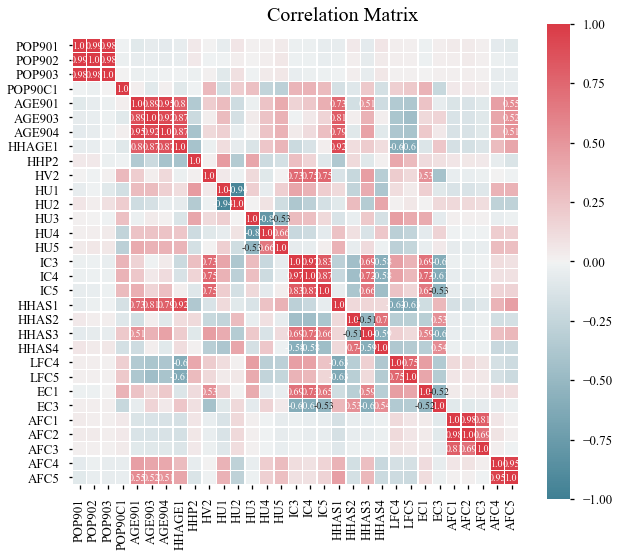

In [22]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(selected[neighborhood].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [23]:
# After general inspection:  
# we have two options, either to remove variables manually or use PCA / T-Sne algorithms to find the cluster cuts automatically. 
# I will reduce the number of items so everything would be more understandble afterwards.

# so first - select variables 
# second - apply the PCA / T-Sne algorithm to reduce some dimensions 

## Clustering Part 1
### Manual variable selection and hierarchical clustering

In [24]:
# as we could see in corr matrix, not all of the variables are useful. Manually selected most influential ones
neighborhood = ['AGE904','IC3','HHAS3', 'AFC4','EC3', 'LFC4', 'LFC5']


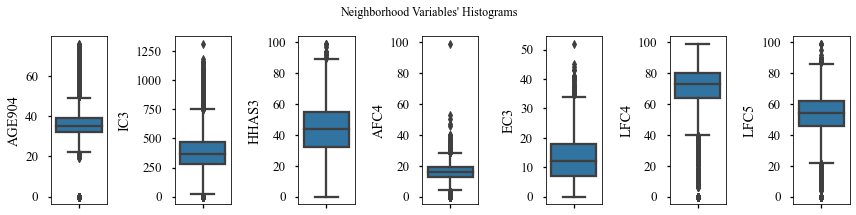

In [25]:
f, axes = plt.subplots(1, 7, figsize=(12,3))

for i in range(len(neighborhood)):
    sns.boxplot(y=neighborhood[i], data=selected[neighborhood], ax=axes[i])

title = "Neighborhood Variables' Histograms"

plt.suptitle(title)


plt.tight_layout()

In [26]:
# here we could use iqr method to filter for outliers, but essentially these outliers should not disrupt the process

In [27]:
selected = data[general+neighborhood]
selected.head(3)

,STATE,ZIP,HOMEOWNR,INCOME,HIT,male,female,couple,age,urbanicity,ses,AGE904,IC3,HHAS3,AFC4,EC3,LFC4,LFC5
29213,NC,27892,0,5.0,0,0,1,0,61.0,Rural,2,36,260,27,11,21,71,50
66189,FL,32579,1,6.0,0,0,1,0,49.0,City,1,31,381,50,19,8,69,58
66410,AZ,85750,1,5.0,0,0,1,0,59.0,NaN,NaN,36,751,72,15,2,78,47


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
normalized = selected.copy()
# metrics like "HOMEOWNR" don't need to be normalized as they vary between 0 and 1
to_normalize = ['HOMEOWNR', 'INCOME', 'HIT',
       'male', 'female', 'couple', 'age', 'ses', 'AGE904', 'IC3',
       'HHAS3', 'AFC4', 'EC3', 'LFC4', 'LFC5']
normalized[to_normalize] = scaler.fit_transform(normalized[to_normalize])

### Clustering with K Means
#### the elbow method

In [29]:
normalized.dropna(inplace=True)

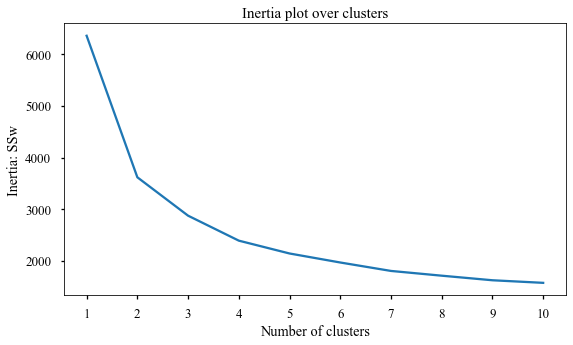

In [30]:
# compute centroids and find inertia values to plot.

from sklearn.cluster import  KMeans
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(normalized[to_normalize])
    inertia.append(kmclust.inertia_)
    
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.xticks(range(10) , range(1,11))
plt.show()

we can see potentially 2 or 3 distinct clusters. experiments states that 2 is not enough, we want to visualize more stuff!

In [31]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(normalized[neighborhood])
normalized['label_1'] = km_labels

labeled = pd.concat((normalized.reset_index(drop=True), pd.Series(km_labels, name='label_1')), axis=1)
labeled_norm = pd.concat((normalized.reset_index(drop=True), pd.Series(km_labels, name='label_1')), axis=1)

In [32]:
# we can see that algo cut the data according to HH income/ education / HH dividend income levels

# 0 -> low income / no dividends / younger/ higher education
# 1 -> income based on dividends, average edu lvl and more vets in neighborhood
# 2-> high income earners gaining from rent and dividends, living in non educated neighborhoods

<AxesSubplot:xlabel='Cluster', ylabel='Normalized value'>

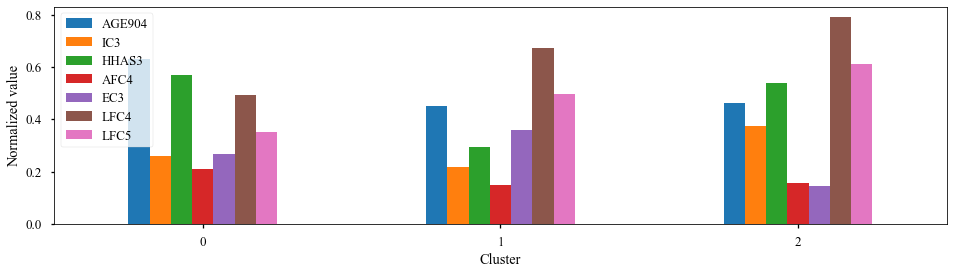

In [33]:
c_sum1 = normalized.groupby('label_1').mean().reset_index()
c_sum1[neighborhood+["label_1"]].set_index("label_1").loc[[0,1,2]].plot(kind='bar', figsize=(16,4), xlabel="Cluster", ylabel="Normalized value", rot=0)

In [34]:
# let's add another layer to clusters and create a dendogram
normalized[['City', 'Rural', 'Suburban', 'Town', 'Urban']] = pd.get_dummies(normalized['urbanicity'])
normalized.drop('urbanicity', axis = 1, inplace = True)
general = ['HOMEOWNR', 'INCOME', 'HIT', 'male', 'female', 'couple', 'age', 'ses','City', 'Rural', 'Suburban', 'Town', 'Urban']
location = ['STATE', 'ZIP']

In [35]:
normalized[general] = normalized[general].fillna((normalized[general].mean()))

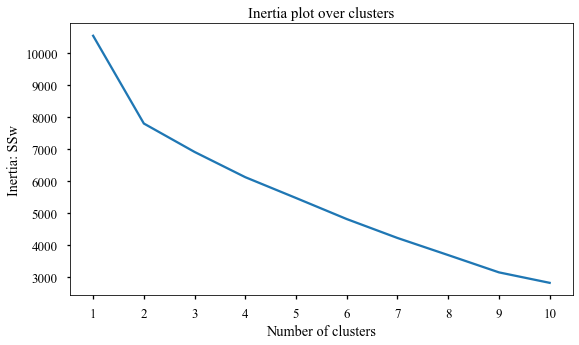

In [36]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(normalized[general])
    inertia.append(kmclust.inertia_)
    
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.xticks(range(10) , range(1,11))
plt.show()

In [37]:
# can see a  bend on 2/3 clusters although it's not really significant, education! let's try wuth 3:
number_clusters = 3

kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(normalized[general])
normalized['label_2'] = km_labels

c_sum = normalized.groupby('label_2').mean().reset_index()
# Preview average values of fields that were used to create clusters
c_sum[["label_2"]+general]

,label_2,HOMEOWNR,INCOME,HIT,male,female,couple,age,ses,City,Rural,Suburban,Town,Urban
0,0,0.763073,0.509721,0.022711,0.996782,0.000000,0.045857,0.550723,0.296192,0.205953,0.209976,0.254224,0.216412,0.113435
1,1,0.715005,0.445064,0.017907,0.074127,0.989205,0.001439,0.550481,0.333933,0.296510,0.249010,0.000000,0.290752,0.163728
2,2,0.814286,0.560073,0.021442,0.053846,0.983516,0.009890,0.518375,0.192308,0.000000,0.000000,1.000000,0.000000,0.000000


In [38]:
# New contigency table
normalized.groupby(['label_1', 'label_2'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('label_2', 'label_1', 0)

label_1,0,1,2
label_2,,,
0,248,1008,1230
1,313,1343,1123
2,43,199,668


In [39]:
# Centroids of the concatenated cluster labels
df_centroids = normalized.groupby(['label_1', 'label_2'])[general].mean()

In [40]:
from sklearn.cluster import  AgglomerativeClustering
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [41]:
hclust.distances_

array([0.24230237, 0.35259212, 0.35488981, 0.35710816, 0.40822645,
       0.49206219, 1.96820046, 2.79569073])

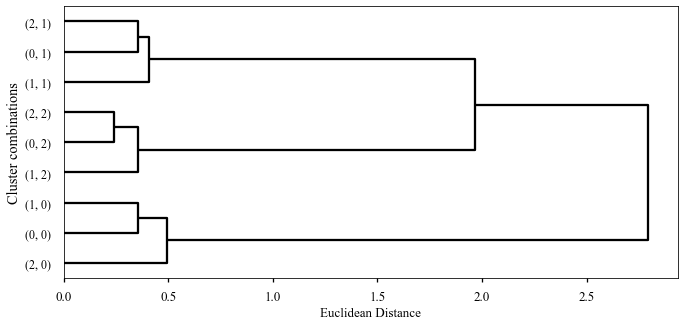

In [42]:
from scipy.cluster.hierarchy import dendrogram

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
fig = plt.figure(figsize=(11,5))

dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=0.2, above_threshold_color='k',orientation='right' )
plt.ylabel('Cluster combinations')
plt.xlabel(f'Euclidean Distance', fontsize=13)

plt.show()

In [43]:
normalized.groupby(['label_1', 'label_2'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('label_2', 'label_1', 0)

label_1,0,1,2
label_2,,,
0,248,1008,1230
1,313,1343,1123
2,43,199,668


### Save csv for another notebook

In [44]:
normalized.to_csv('neighborhood.csv')
# Let's export this for another notebook. I will walk you through Folium maps and we will see who our dots are

In [45]:
# outside rationality, there lies math
# Lower part - study purposes

## Part 2 - PCA
_an alternative which does not require too much is based on variance_  

_PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables,   
PCA does not work well to reduce data. Refer to the correlation matrix to determine. In general, if most of the correlation  
coefficients are smaller than 0.3, PCA will not help. we have seen in the corr matrix above, that there are a lot of  
correlation going on with out variables, so this should be a viable solution_

In [46]:
from sklearn.decomposition import PCA
# define dataframes that we want to work with.
# since we are working with PCA, we will use all the variables, even if they are highly correlated.
# PCA automates the decision making at this point

selection = ['POP901', 'POP902', 'POP903', 'POP90C1', 'AGE901',
       'AGE903', 'AGE904', 'HHAGE1', 'HHP2', 'HV2', 'HU1', 'HU2', 'HU3', 'HU4',
       'HU5', 'IC3', 'IC4', 'IC5', 'HHAS1', 'HHAS2', 'HHAS3', 'HHAS4', 'LFC4',
       'LFC5', 'EC1', 'EC3', 'AFC1', 'AFC2', 'AFC3', 'AFC4', 'AFC5', 'AFC6']
sample_data = pd.DataFrame(data[selection])

In [47]:
pca = PCA(n_components=5)
pca.fit(sample_data)

PCA(n_components=5)

In [48]:
# Output PCA table where we can see the distances and variances
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,7.501308e+07,0.000000e+00,0.687722,0.687722
2,3.348819e+07,-4.152489e+07,0.307021,0.994742
3,3.857344e+05,-3.310246e+07,0.003536,0.998279
4,1.335672e+05,-2.521671e+05,0.001225,0.999503
5,3.595553e+04,-9.761170e+04,0.000330,0.999833


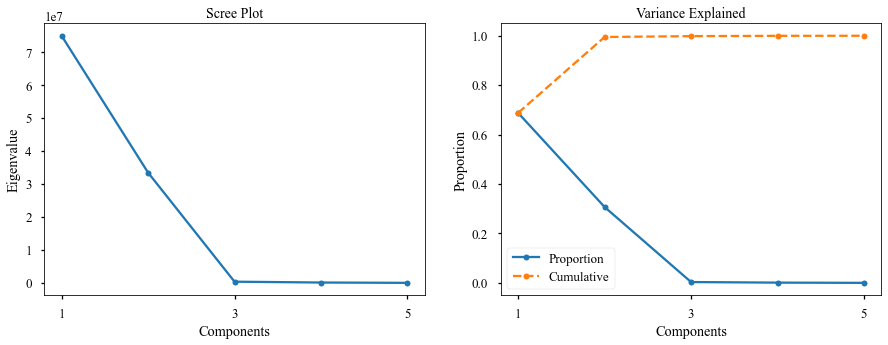

In [49]:
# Let's plot the explained variance and check how many components should be used

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [50]:
 # Perform PCA again with the number of principal components you want to retain
 # from result above we can see that 2 is the right option as explained variance is almost 1

pca = PCA(n_components=2)
pca_feat = pca.fit_transform(data[selection])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=data.index, columns=pca_feat_names) 
data[pca_feat_names] = pca_df

In [51]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = data[selection + pca_feat_names].corr().loc[selection, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1
POP901,-0.078433,0.996580
POP902,-0.069740,0.987980
POP903,-0.053923,0.983628
POP90C1,0.301051,0.012667
AGE901,0.357490,-0.047061
AGE903,0.160648,-0.043962
AGE904,0.284887,-0.037813
HHAGE1,0.035133,-0.044036
HHP2,-0.097865,0.036807
HV2,0.750215,0.061326


In [52]:
# so what PCA did was that it computed new variables based on variance to initial variables
# seems that PC0 is responsible for income where PC1 for density of neighbourhood
# from here on we could make presumptions and perform clustering again

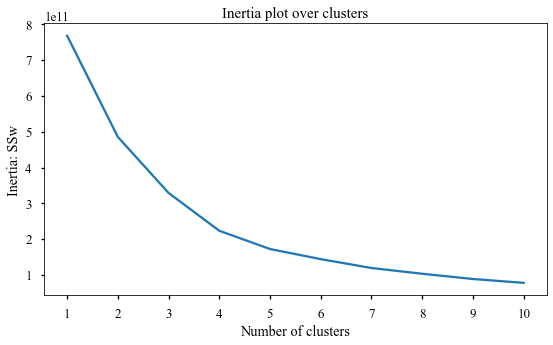

In [53]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(data[pca_feat_names])
    inertia.append(kmclust.inertia_)
    
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.xticks(range(10) , range(1,11))
plt.show()

In [54]:
# we will use 3 because the drop is bigger and results are more visible later on
number_clusters = 3

kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(data[pca_feat_names])
data['PCA_Label'] = km_labels

c_sum = data.groupby('PCA_Label').mean().reset_index()
# Preview average values of fields that were used to create clusters
c_sum[["PCA_Label"]+pca_feat_names]

,PCA_Label,PC0,PC1
0,0,-2193.586764,-960.870823
1,1,17815.387059,-158.578912
2,2,-3049.848510,25640.004667


In [55]:
new_x1 = data[data["PCA_Label"] == 0]['PC0'] 
new_y1 = data[data["PCA_Label"] == 0]['PC1'] 

new_x2 = data[data["PCA_Label"] == 1]['PC0'] 
new_y2 = data[data["PCA_Label"] == 1]['PC1']

new_x3 = data[data["PCA_Label"] == 2]['PC0']
new_y3 = data[data["PCA_Label"] == 2]['PC1'] 

In [56]:
fig = go.Figure(data=go.Scatter(x=new_x3, y=new_y3, mode='markers'))
fig.add_trace(go.Scatter(x=new_x1, y=new_y1,
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=new_x2, y=new_y2,
                    mode='markers',
                    name='markers'))
fig.show()

In [57]:
# can see three clusters again, just this time it harder to interpret the results. PCA was a mix of HH income and education, therefore the 
# the assumption would be that rich are in the right and not so rich but better educated lives on top, where third cluster is averages

In [58]:
# Let's try to implement T-SNE and check if algo's acting similar?
#let's make a copy of previous df - project Starfish!

starfish = data[selection].copy()
starfish[selection] = scaler.fit_transform(starfish[selection])

## Part 3 - Operation T-SNE

_`t-SNE` is mostly used to understand high-dimensional data and project it into low-dimensional space (like 2D or 3D)_  

it works well with image data and helps significantly in computer vision systems, but it can be applied to anything.   Let us check if TSNE clusters are similar to PCA

In [59]:
from sklearn.manifold import TSNE

In [60]:
# always test multiple set-ups with iterations and perplexity.

tsne = TSNE(n_components=3, verbose=1, perplexity=10, n_iter=500)
tsne_results = tsne.fit_transform(starfish)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7079 samples in 0.081s...
[t-SNE] Computed neighbors for 7079 samples in 1.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7079
[t-SNE] Computed conditional probabilities for sample 2000 / 7079
[t-SNE] Computed conditional probabilities for sample 3000 / 7079
[t-SNE] Computed conditional probabilities for sample 4000 / 7079
[t-SNE] Computed conditional probabilities for sample 5000 / 7079
[t-SNE] Computed conditional probabilities for sample 6000 / 7079
[t-SNE] Computed conditional probabilities for sample 7000 / 7079
[t-SNE] Computed conditional probabilities for sample 7079 / 7079
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.067802
[t-SNE] KL divergence after 500 iterations: 1.767147


In [61]:
starfish['PCA_Label'] = data['PCA_Label']
starfish[['t1','t2','t3']] = tsne_results

In [62]:
number_clusters = 3

kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(starfish[['t1','t2','t3']])
starfish['T_Label'] = km_labels

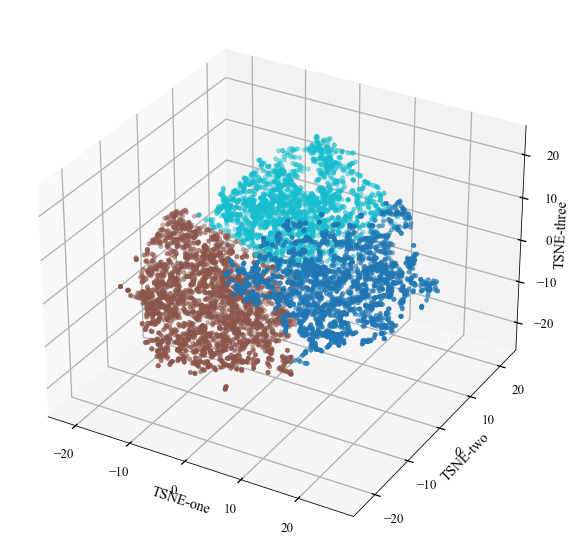

In [63]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=starfish['t1'], 
    ys=starfish['t2'], 
    zs=starfish['t3'],  
    c= starfish['T_Label'],
    cmap='tab10'
)
ax.set_xlabel('TSNE-one')
ax.set_ylabel('TSNE-two')
ax.set_zlabel('TSNE-three')
plt.show()

In [ ]:
# Let's compare these labels to PCA

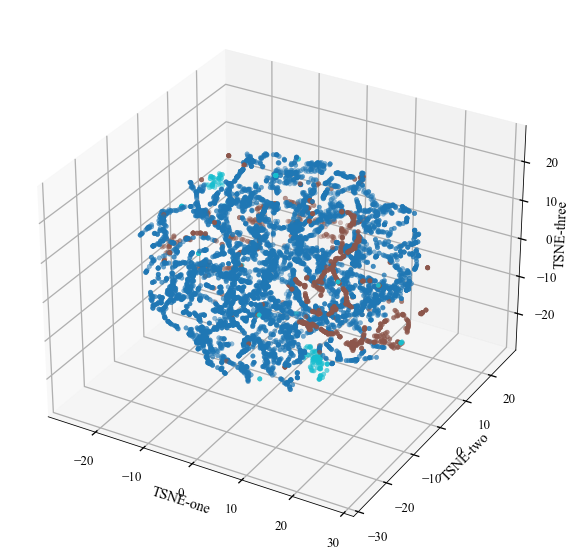

In [75]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=starfish['t1'], 
    ys=starfish['t2'], 
    zs=starfish['t3'],  
    c= starfish['PCA_Label'],
    cmap='tab10'
)
ax.set_xlabel('TSNE-one')
ax.set_ylabel('TSNE-two')
ax.set_zlabel('TSNE-three')
plt.show()


In [63]:
# While clustering after t-SNE will sometimes (often?) work, 
# you will never know whether the "clusters" you find are real, or just artifacts of t-SNE. You may just be seeing shapes in clouds.

# again, the algo is better used in vision systems rather than marketing strategies.